In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.txt', sep=';', names=['lang', 'text'], converters={'text': str, 'lang': str})

In [4]:
data['lang'].unique()

array(['en', 'de', 'ru', 'mk', 'ga', 'es', 'be', 'da', 'bs', 'sk', 'pt',
       'fr', 'cs', 'pl', 'sq', 'sl', 'nl', 'bg', 'ro', 'sv', 'uk', 'sr',
       'cy'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['lang'], test_size=0.2, random_state=42)

In [6]:
vectorizers = {}

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfs  = {
    "1-1_Char_TfidfVectorizer": TfidfVectorizer(lowercase=True, ngram_range=(1,1), analyzer='char'),
    "1-3_Char_TfidfVectorizer": TfidfVectorizer(lowercase=True, ngram_range=(1,3), analyzer='char'),
}

for name, vec in tfidfs.items():
    vec.fit(x_train)
    vectorizers[name] = lambda xs: vec.transform(xs)

In [15]:
tfidfs['1-3_Char_TfidfVectorizer'].vocabulary_

{'c': 120275,
 'h': 143543,
 'o': 178583,
 'a': 109078,
 'l': 162119,
 'e': 129749,
 ' ': 524,
 't': 201902,
 'm': 167522,
 'b': 116019,
 'i': 148158,
 'é': 248677,
 'n': 172514,
 'p': 184278,
 'r': 190156,
 'u': 207555,
 'd': 124446,
 ',': 52413,
 's': 196315,
 'j': 154333,
 'v': 212314,
 'x': 218463,
 'z': 224887,
 'í': 251708,
 'y': 221054,
 '.': 60404,
 'g': 139411,
 'ú': 258189,
 'ó': 254599,
 '2': 74894,
 '0': 68101,
 '1': 71343,
 'f': 136006,
 '(': 36974,
 ')': 48068,
 '3': 78555,
 '8': 92784,
 '9': 95262,
 '[': 103654,
 ']': 106411,
 '\u200b': 410309,
 '4': 81814,
 'á': 243458,
 '6': 87736,
 '°': 239015,
 "'": 34623,
 '"': 29961,
 '5': 84853,
 'w': 215917,
 '7': 90355,
 'ch': 121911,
 'ho': 145801,
 'oa': 180039,
 'ac': 110973,
 'ca': 121403,
 'al': 111936,
 'll': 164464,
 'le': 163811,
 'e ': 129755,
 ' o': 7390,
 'o ': 178592,
 ' t': 8081,
 'ta': 203313,
 'am': 112102,
 'mb': 168904,
 'bi': 117667,
 'ié': 152653,
 'én': 249421,
 'n ': 172519,
 ' p': 7521,
 'pr': 186583,
 'ro'

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

models = {
    "MultinomialNB": lambda x, y: MultinomialNB().fit(x, y),
    "RandomForestClassifier": lambda x, y: RandomForestClassifier(n_jobs=-1).fit(x, y),
    "LinearSVC": lambda x, y: LinearSVC().fit(x, y),
    "LogisticRegression": lambda x, y: LogisticRegression(solver='saga', max_iter=20).fit(x, y)
}

In [9]:
results = {}

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def check_model(vectorizer, vectorizer_name, model, model_name):
    model = model(vectorizer(x_train), y_train)
    actual_labels = y_test
    predicted_labels = model.predict(vectorizer(x_test))
    print(vectorizer_name)
    print(model_name)
    name = vectorizer_name + '_' + model_name
    results[name] = {
        'accuracy': accuracy_score(actual_labels, predicted_labels),
        'precision': precision_score(actual_labels, predicted_labels, average='macro'),
        'recall': recall_score(actual_labels, predicted_labels, average='macro'),
        'f1': f1_score(actual_labels, predicted_labels, average='macro')
    }
    print(results[name])
    fig, ax = plt.subplots(figsize=(26, 26))
    labels = np.unique(actual_labels)
    labels.sort()
    plot = sns.heatmap(confusion_matrix(actual_labels, predicted_labels), annot=True, ax=ax, xticklabels=labels, yticklabels=labels)
    plot.set_title(f'Confusion Matrix for {name}')
    plot.figure.savefig(f'plots/confusion_matrix_{name}.png')
    #plot.show()
    return actual_labels, predicted_labels


1-1_Char_TfidfVectorizer
MultinomialNB
{'accuracy': 0.9859484352902781, 'precision': 0.9864554599205815, 'recall': 0.9859915972000566, 'f1': 0.9859637513890525}
1-1_Char_TfidfVectorizer
RandomForestClassifier
{'accuracy': 0.9934909526054321, 'precision': 0.993816501167096, 'recall': 0.9935193251465355, 'f1': 0.9935751436184709}
1-1_Char_TfidfVectorizer
LinearSVC
{'accuracy': 0.9940348841425826, 'precision': 0.9943017875197206, 'recall': 0.9940593726151989, 'f1': 0.9941032265828073}
1-1_Char_TfidfVectorizer
LogisticRegression
{'accuracy': 0.9926931863509446, 'precision': 0.9929676215486344, 'recall': 0.9927164081233255, 'f1': 0.9927607602313399}
1-3_Char_TfidfVectorizer
MultinomialNB
{'accuracy': 0.9859484352902781, 'precision': 0.9864554599205815, 'recall': 0.9859915972000566, 'f1': 0.9859637513890525}
1-3_Char_TfidfVectorizer
RandomForestClassifier
{'accuracy': 0.9933277731442869, 'precision': 0.9936580339821781, 'recall': 0.993359708429815, 'f1': 0.9934150108815739}
1-3_Char_TfidfVec

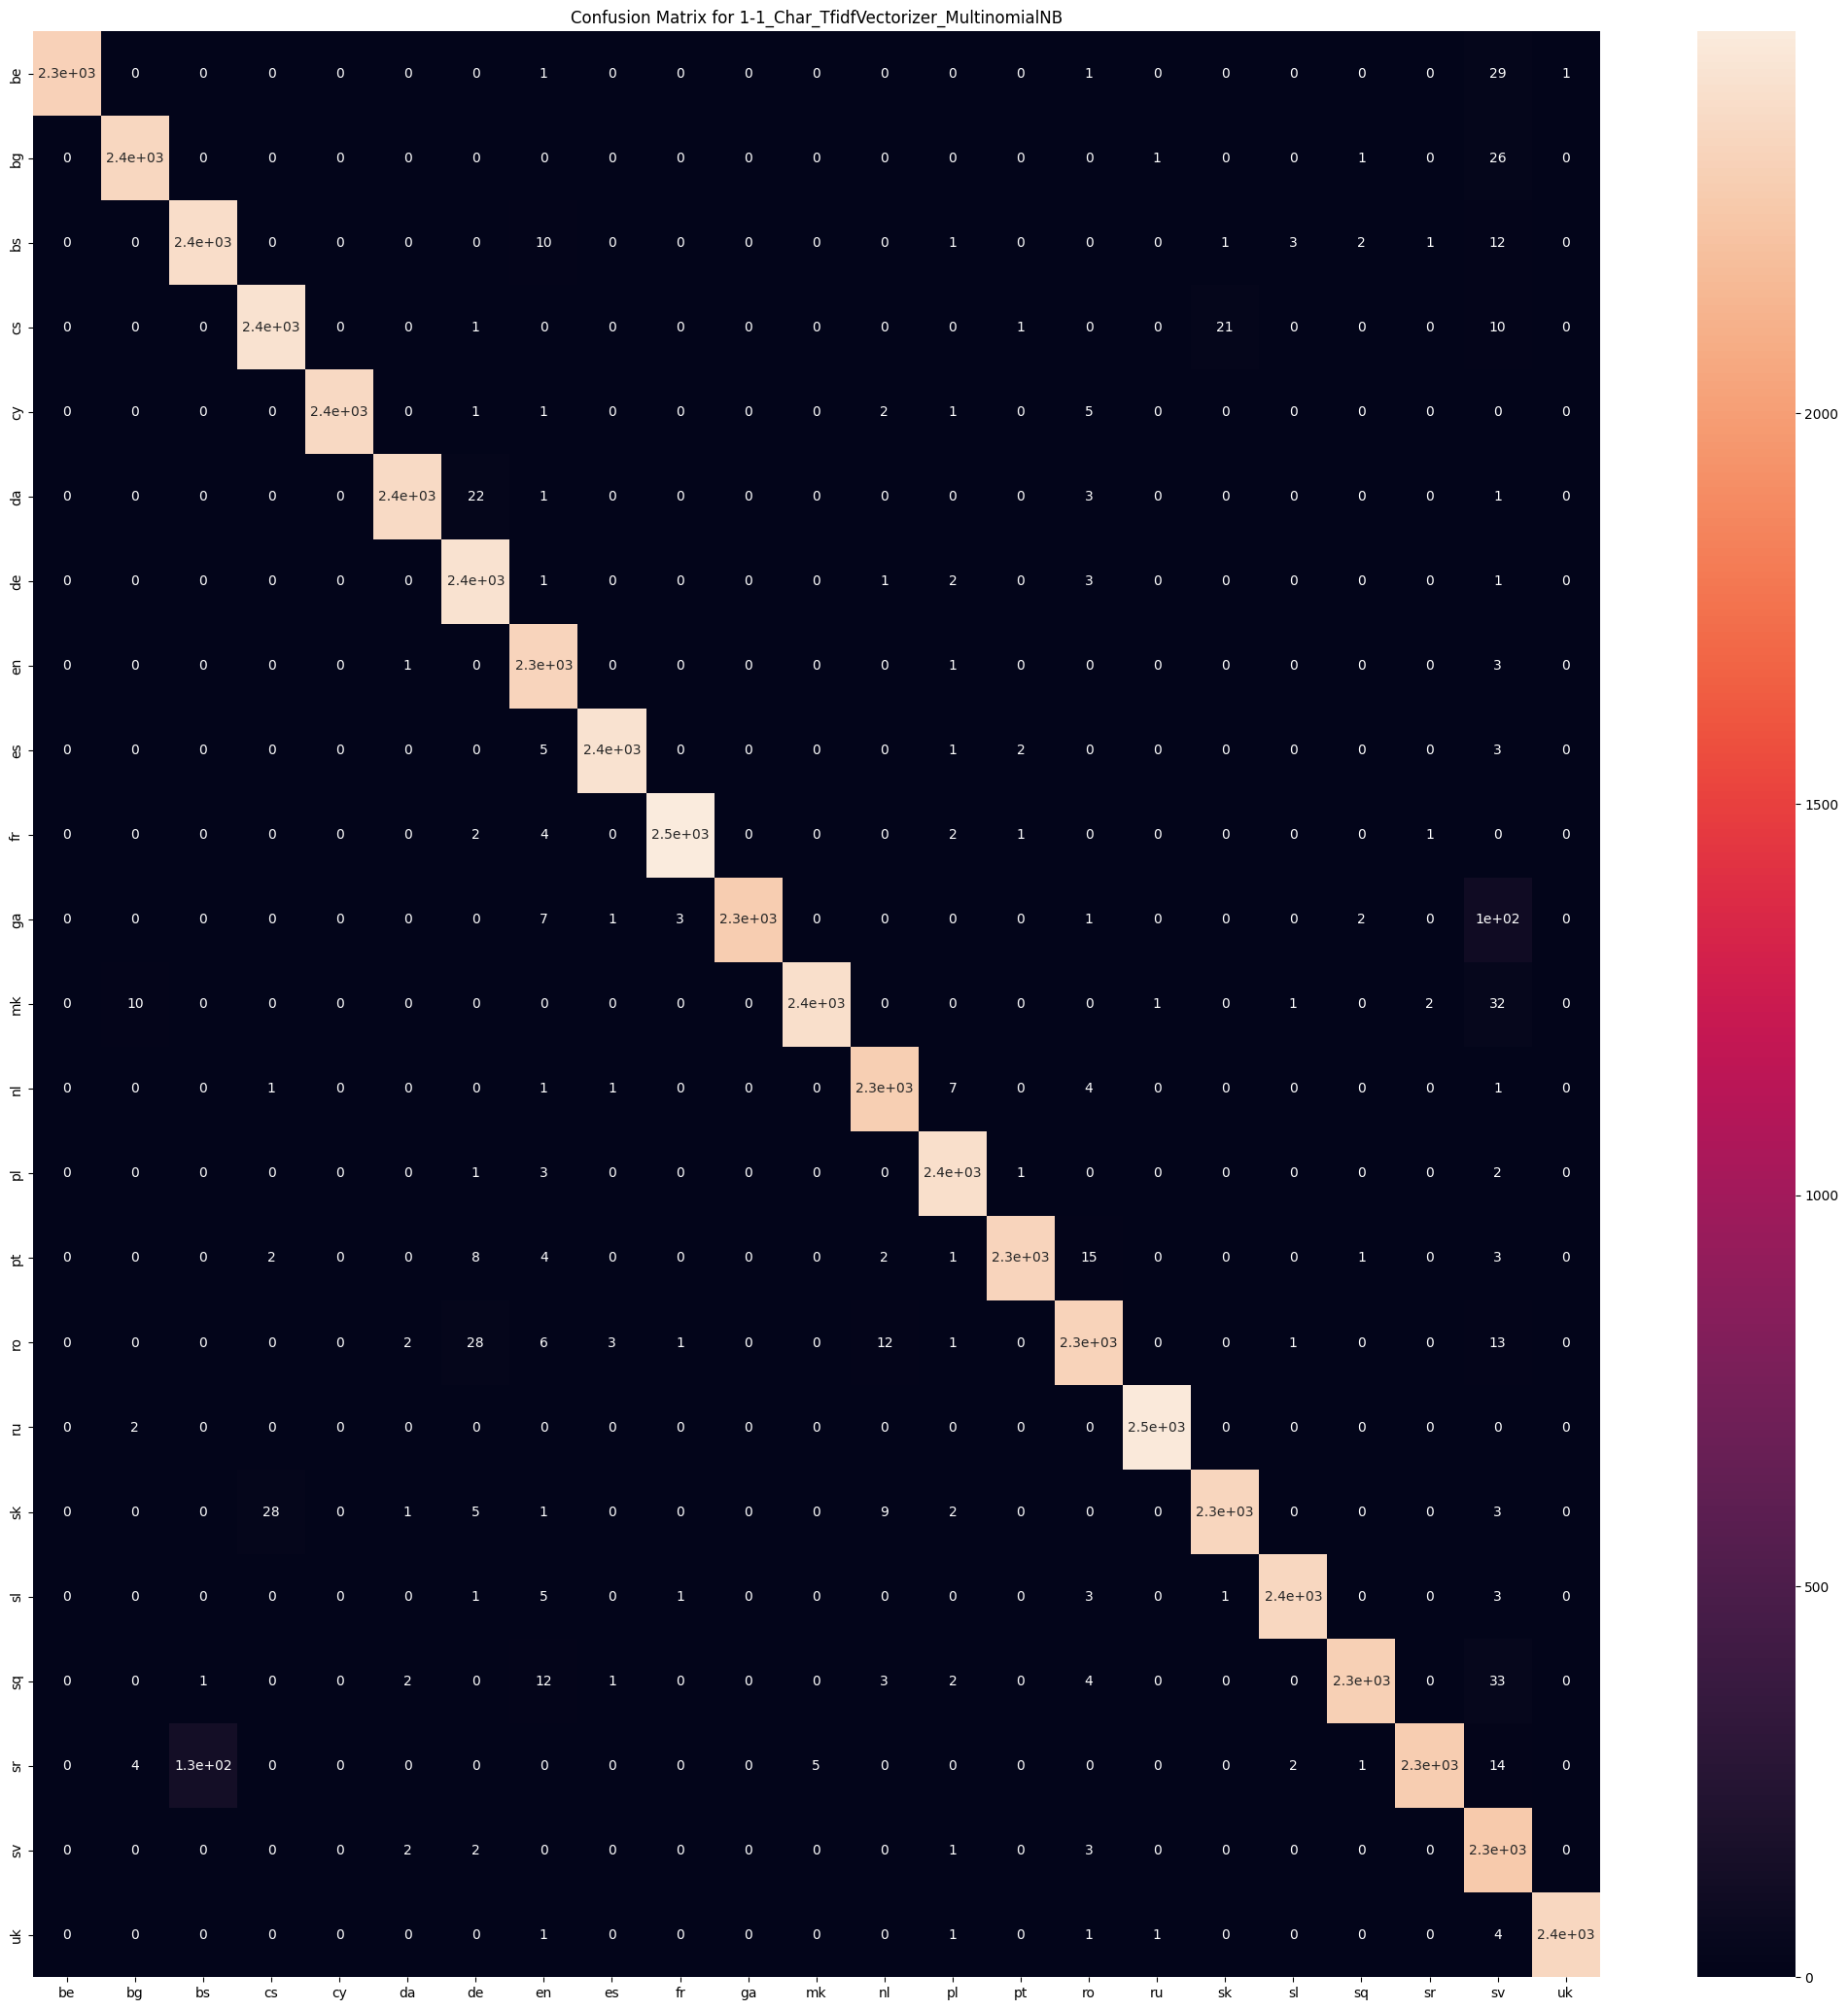

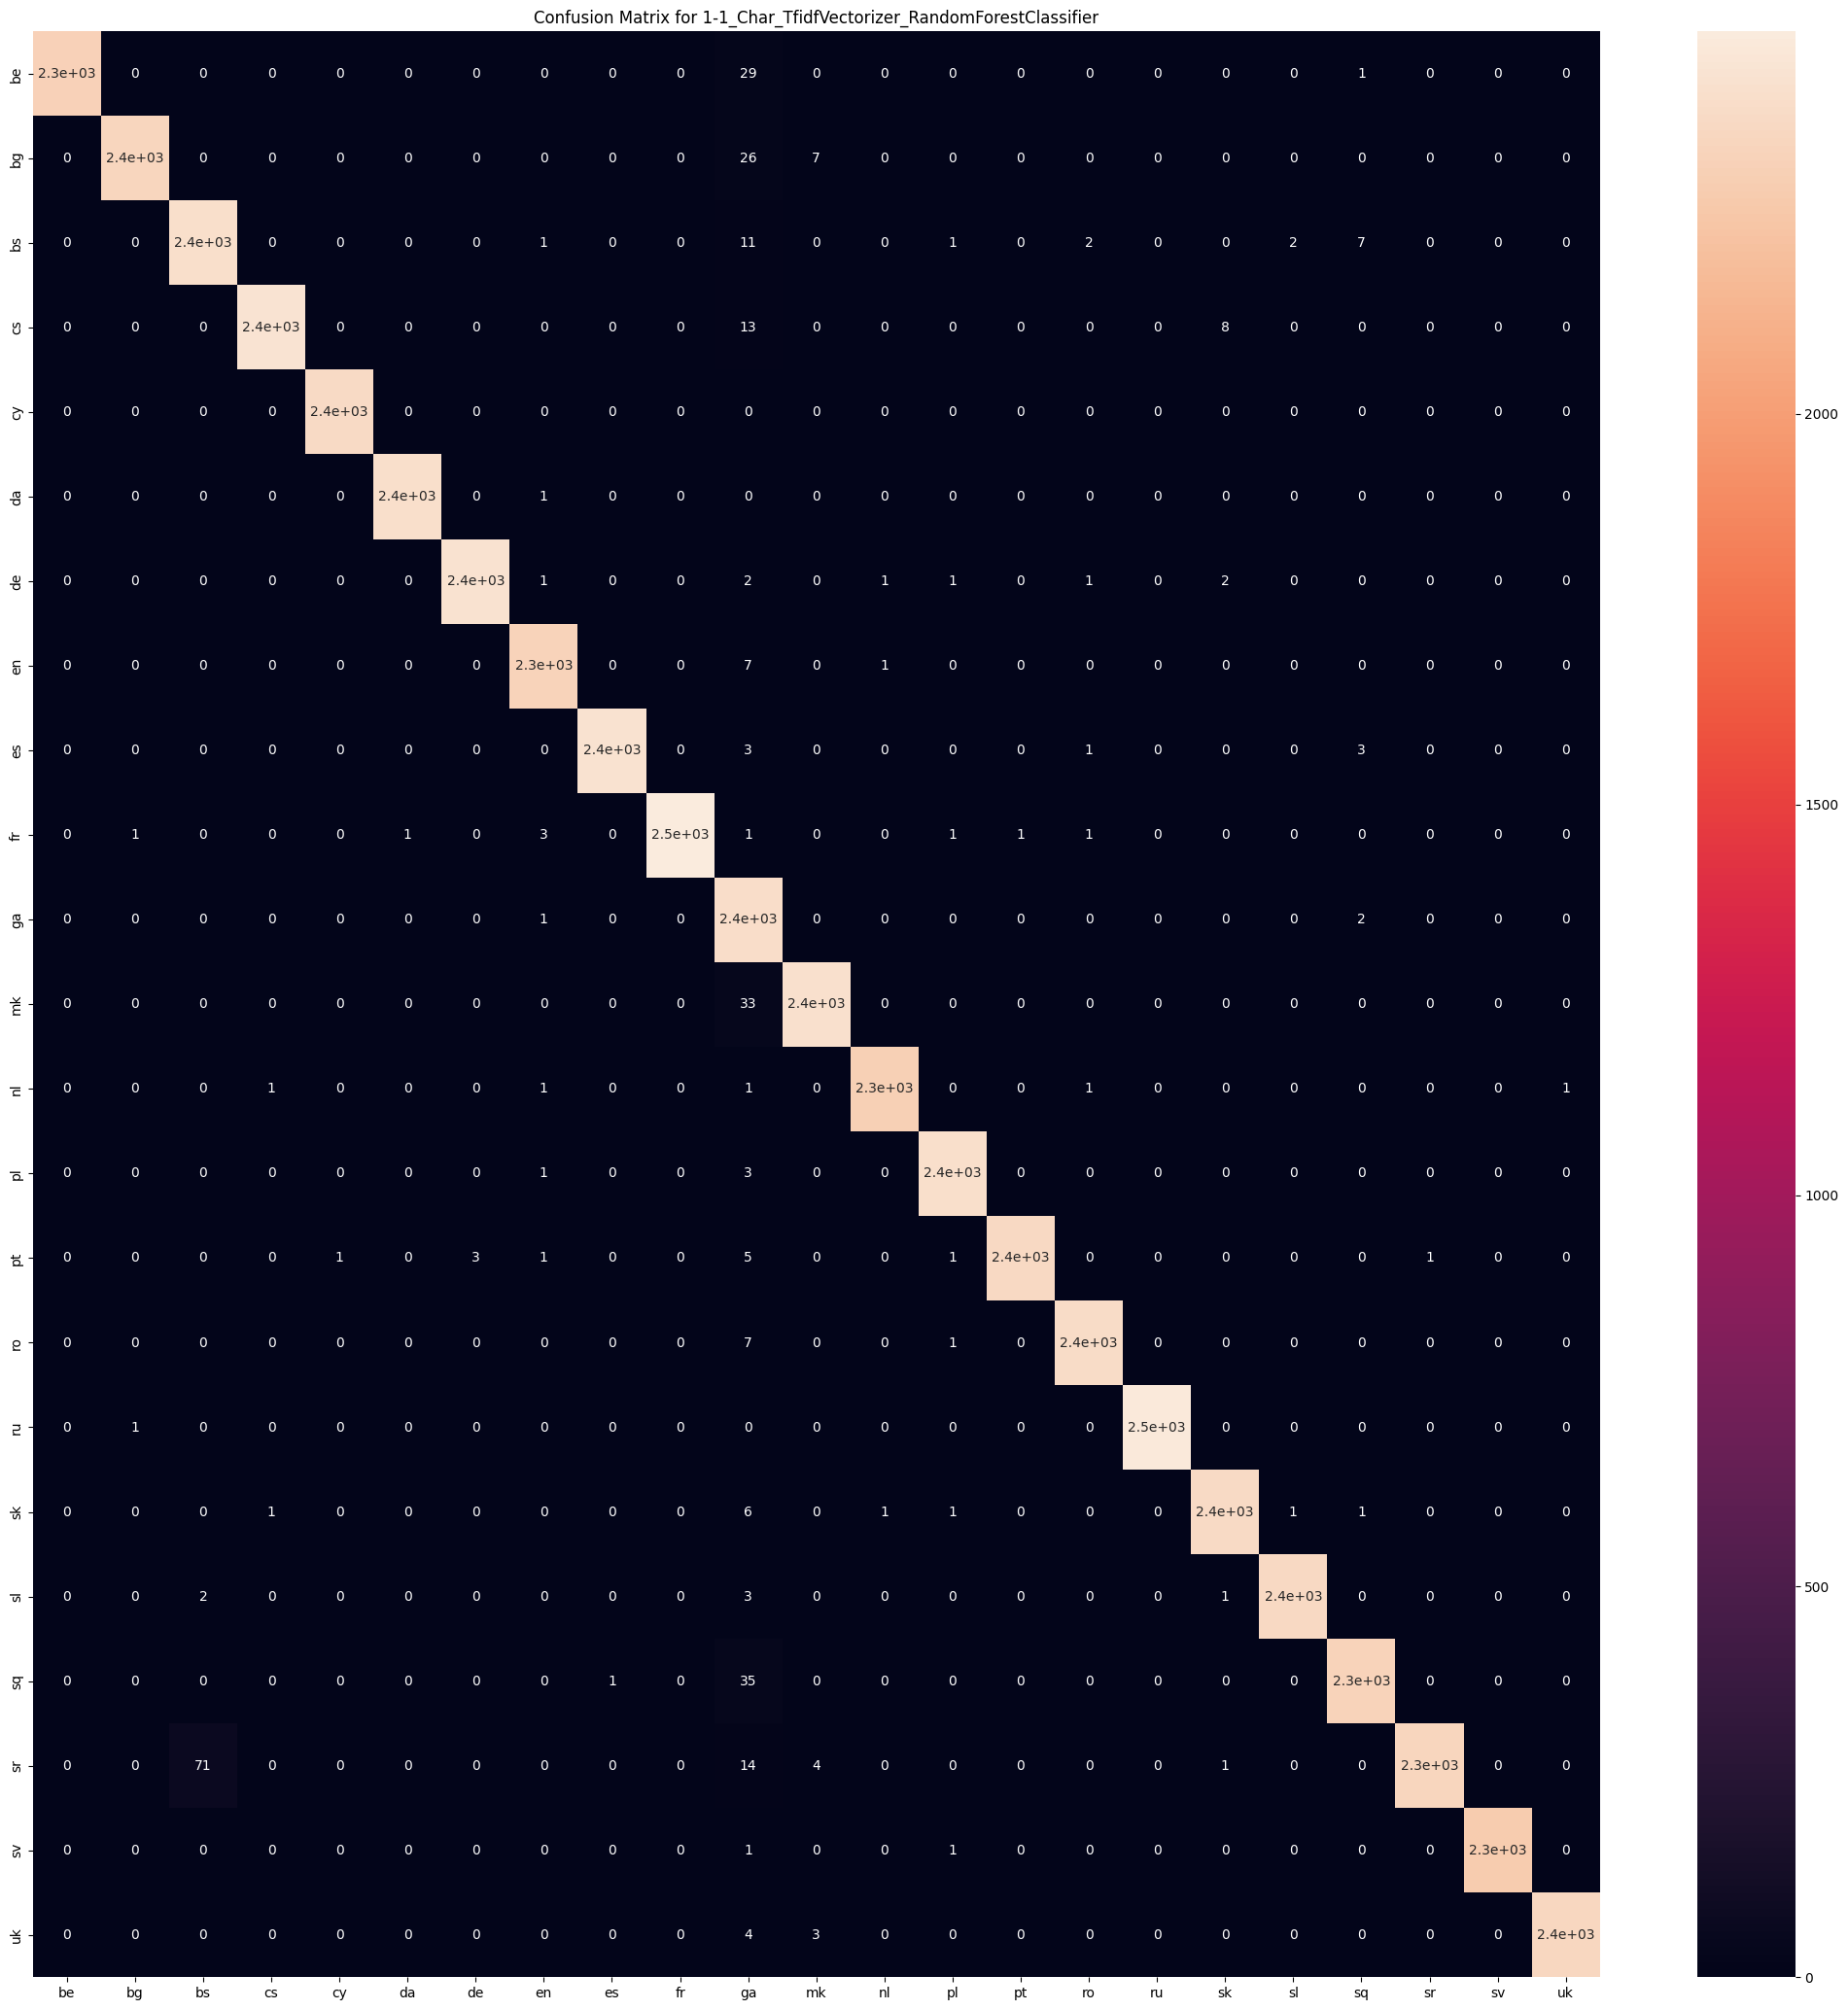

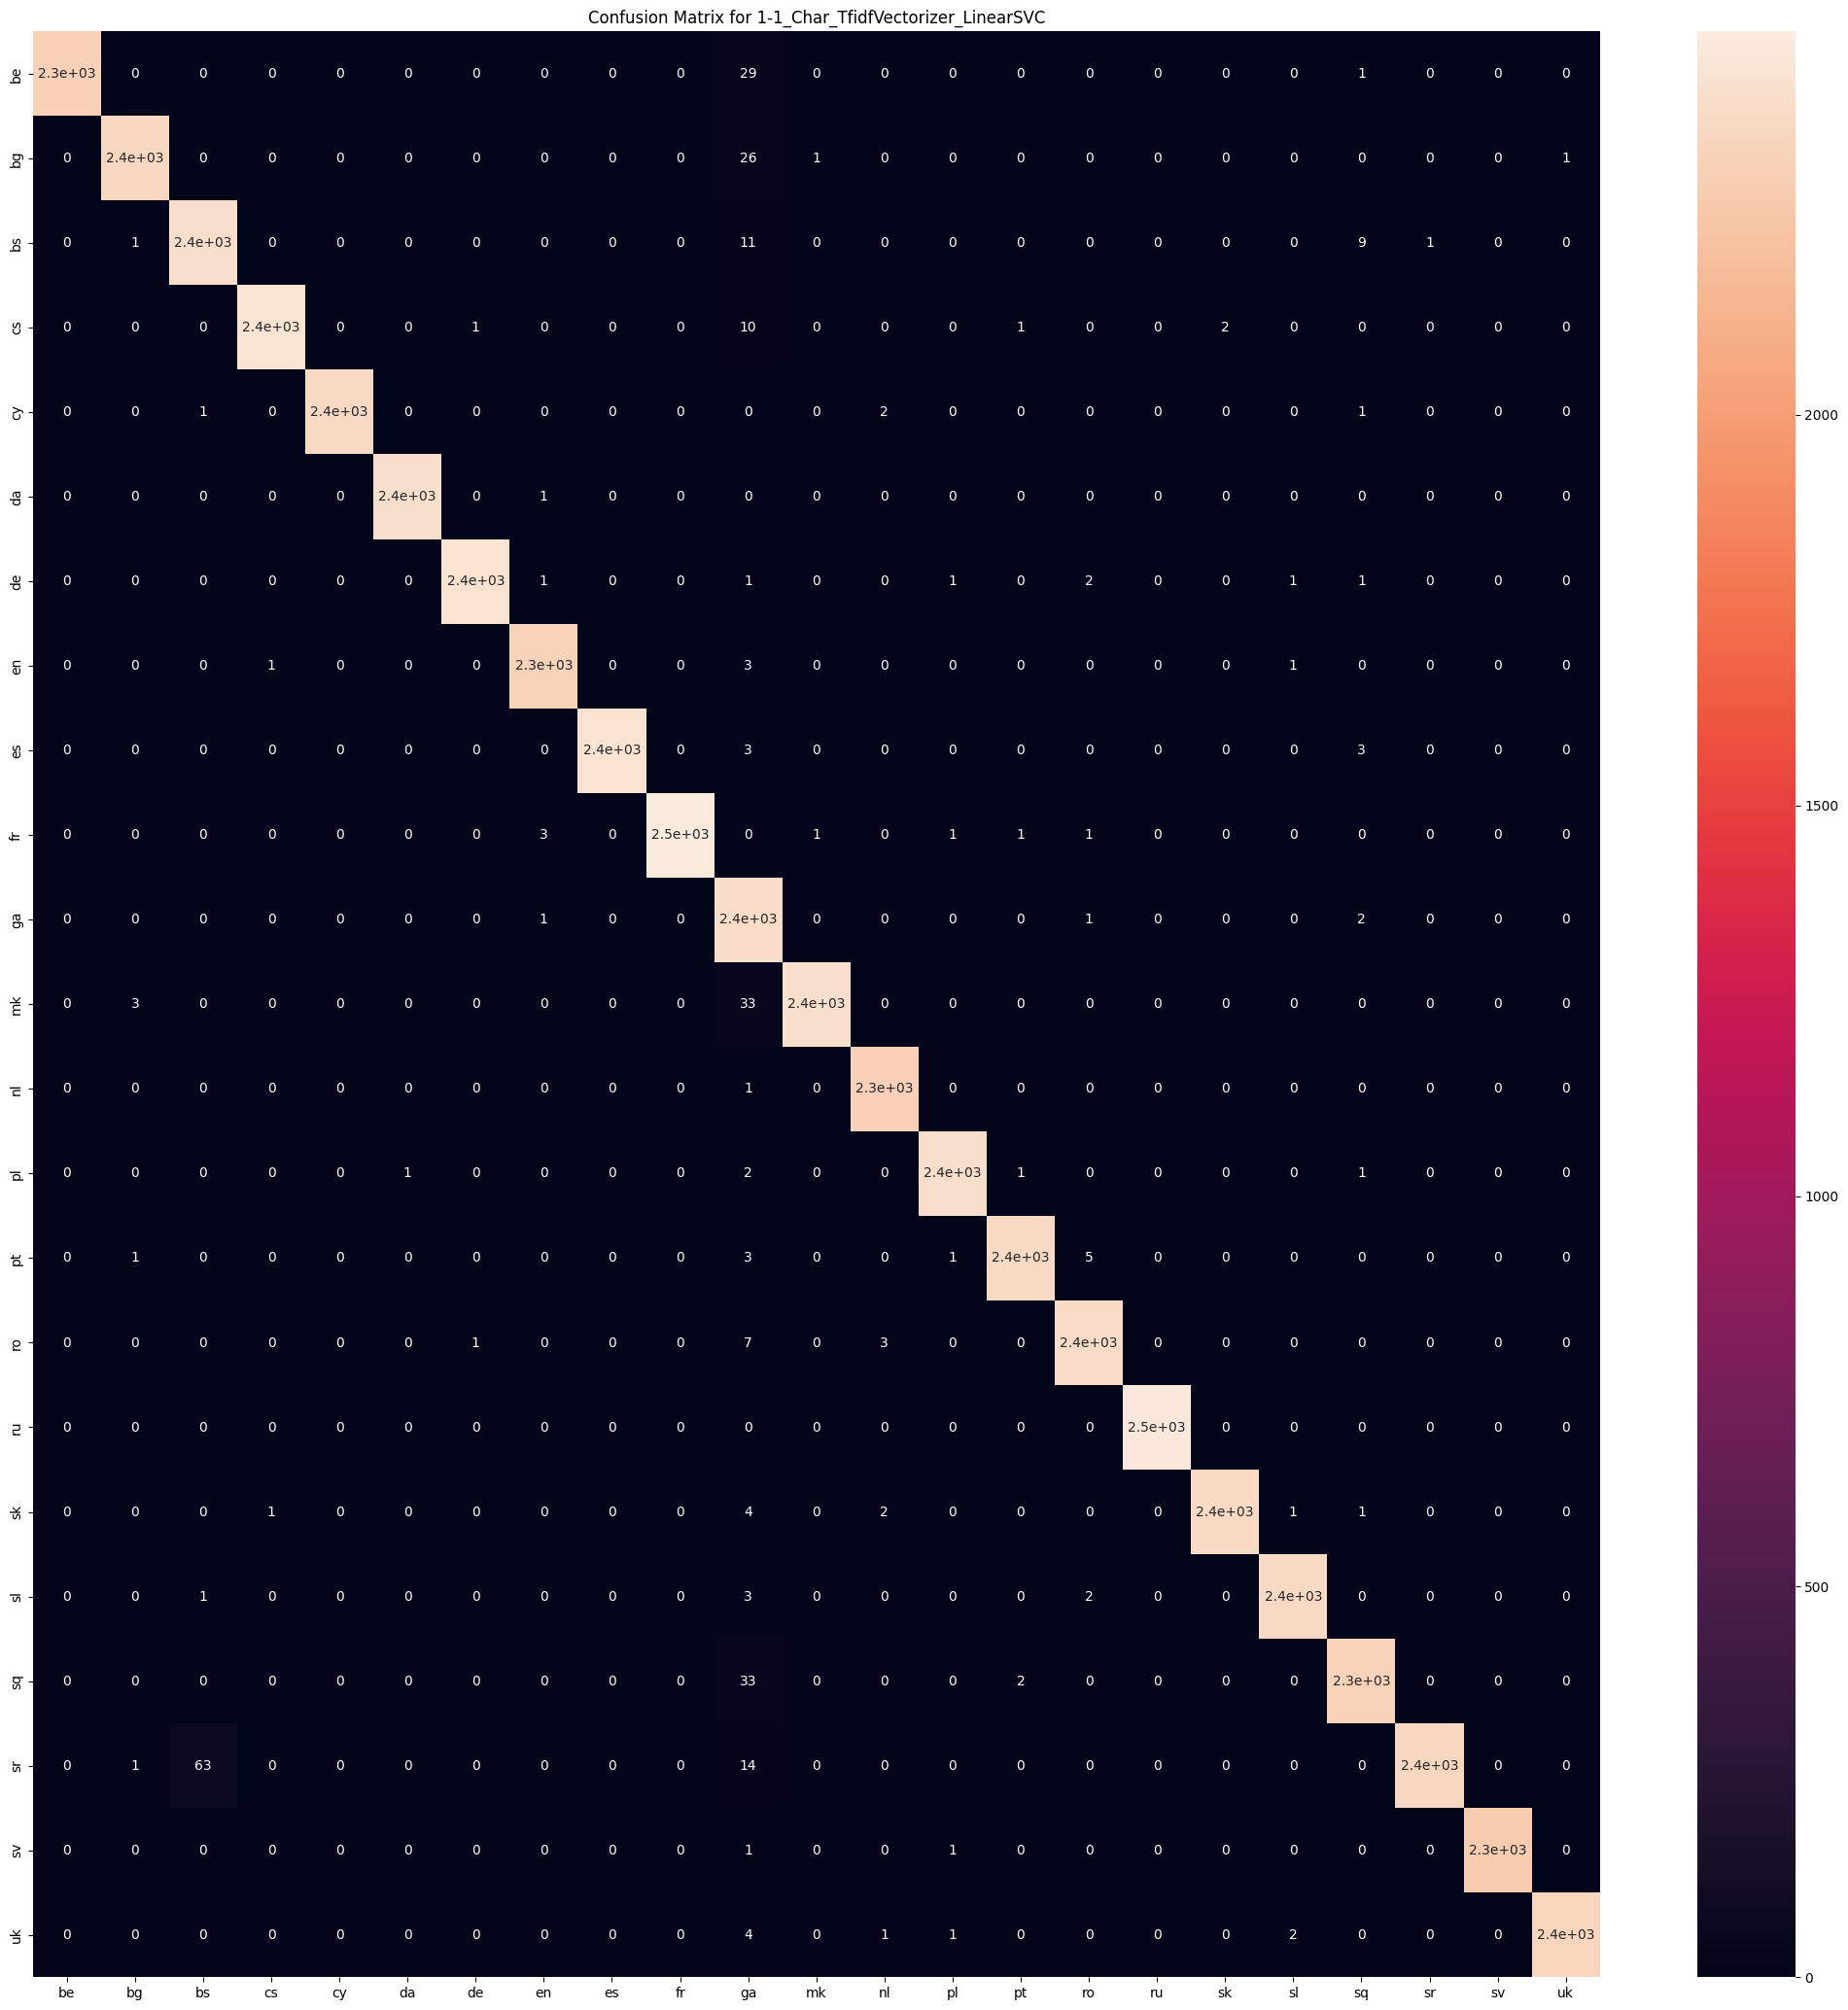

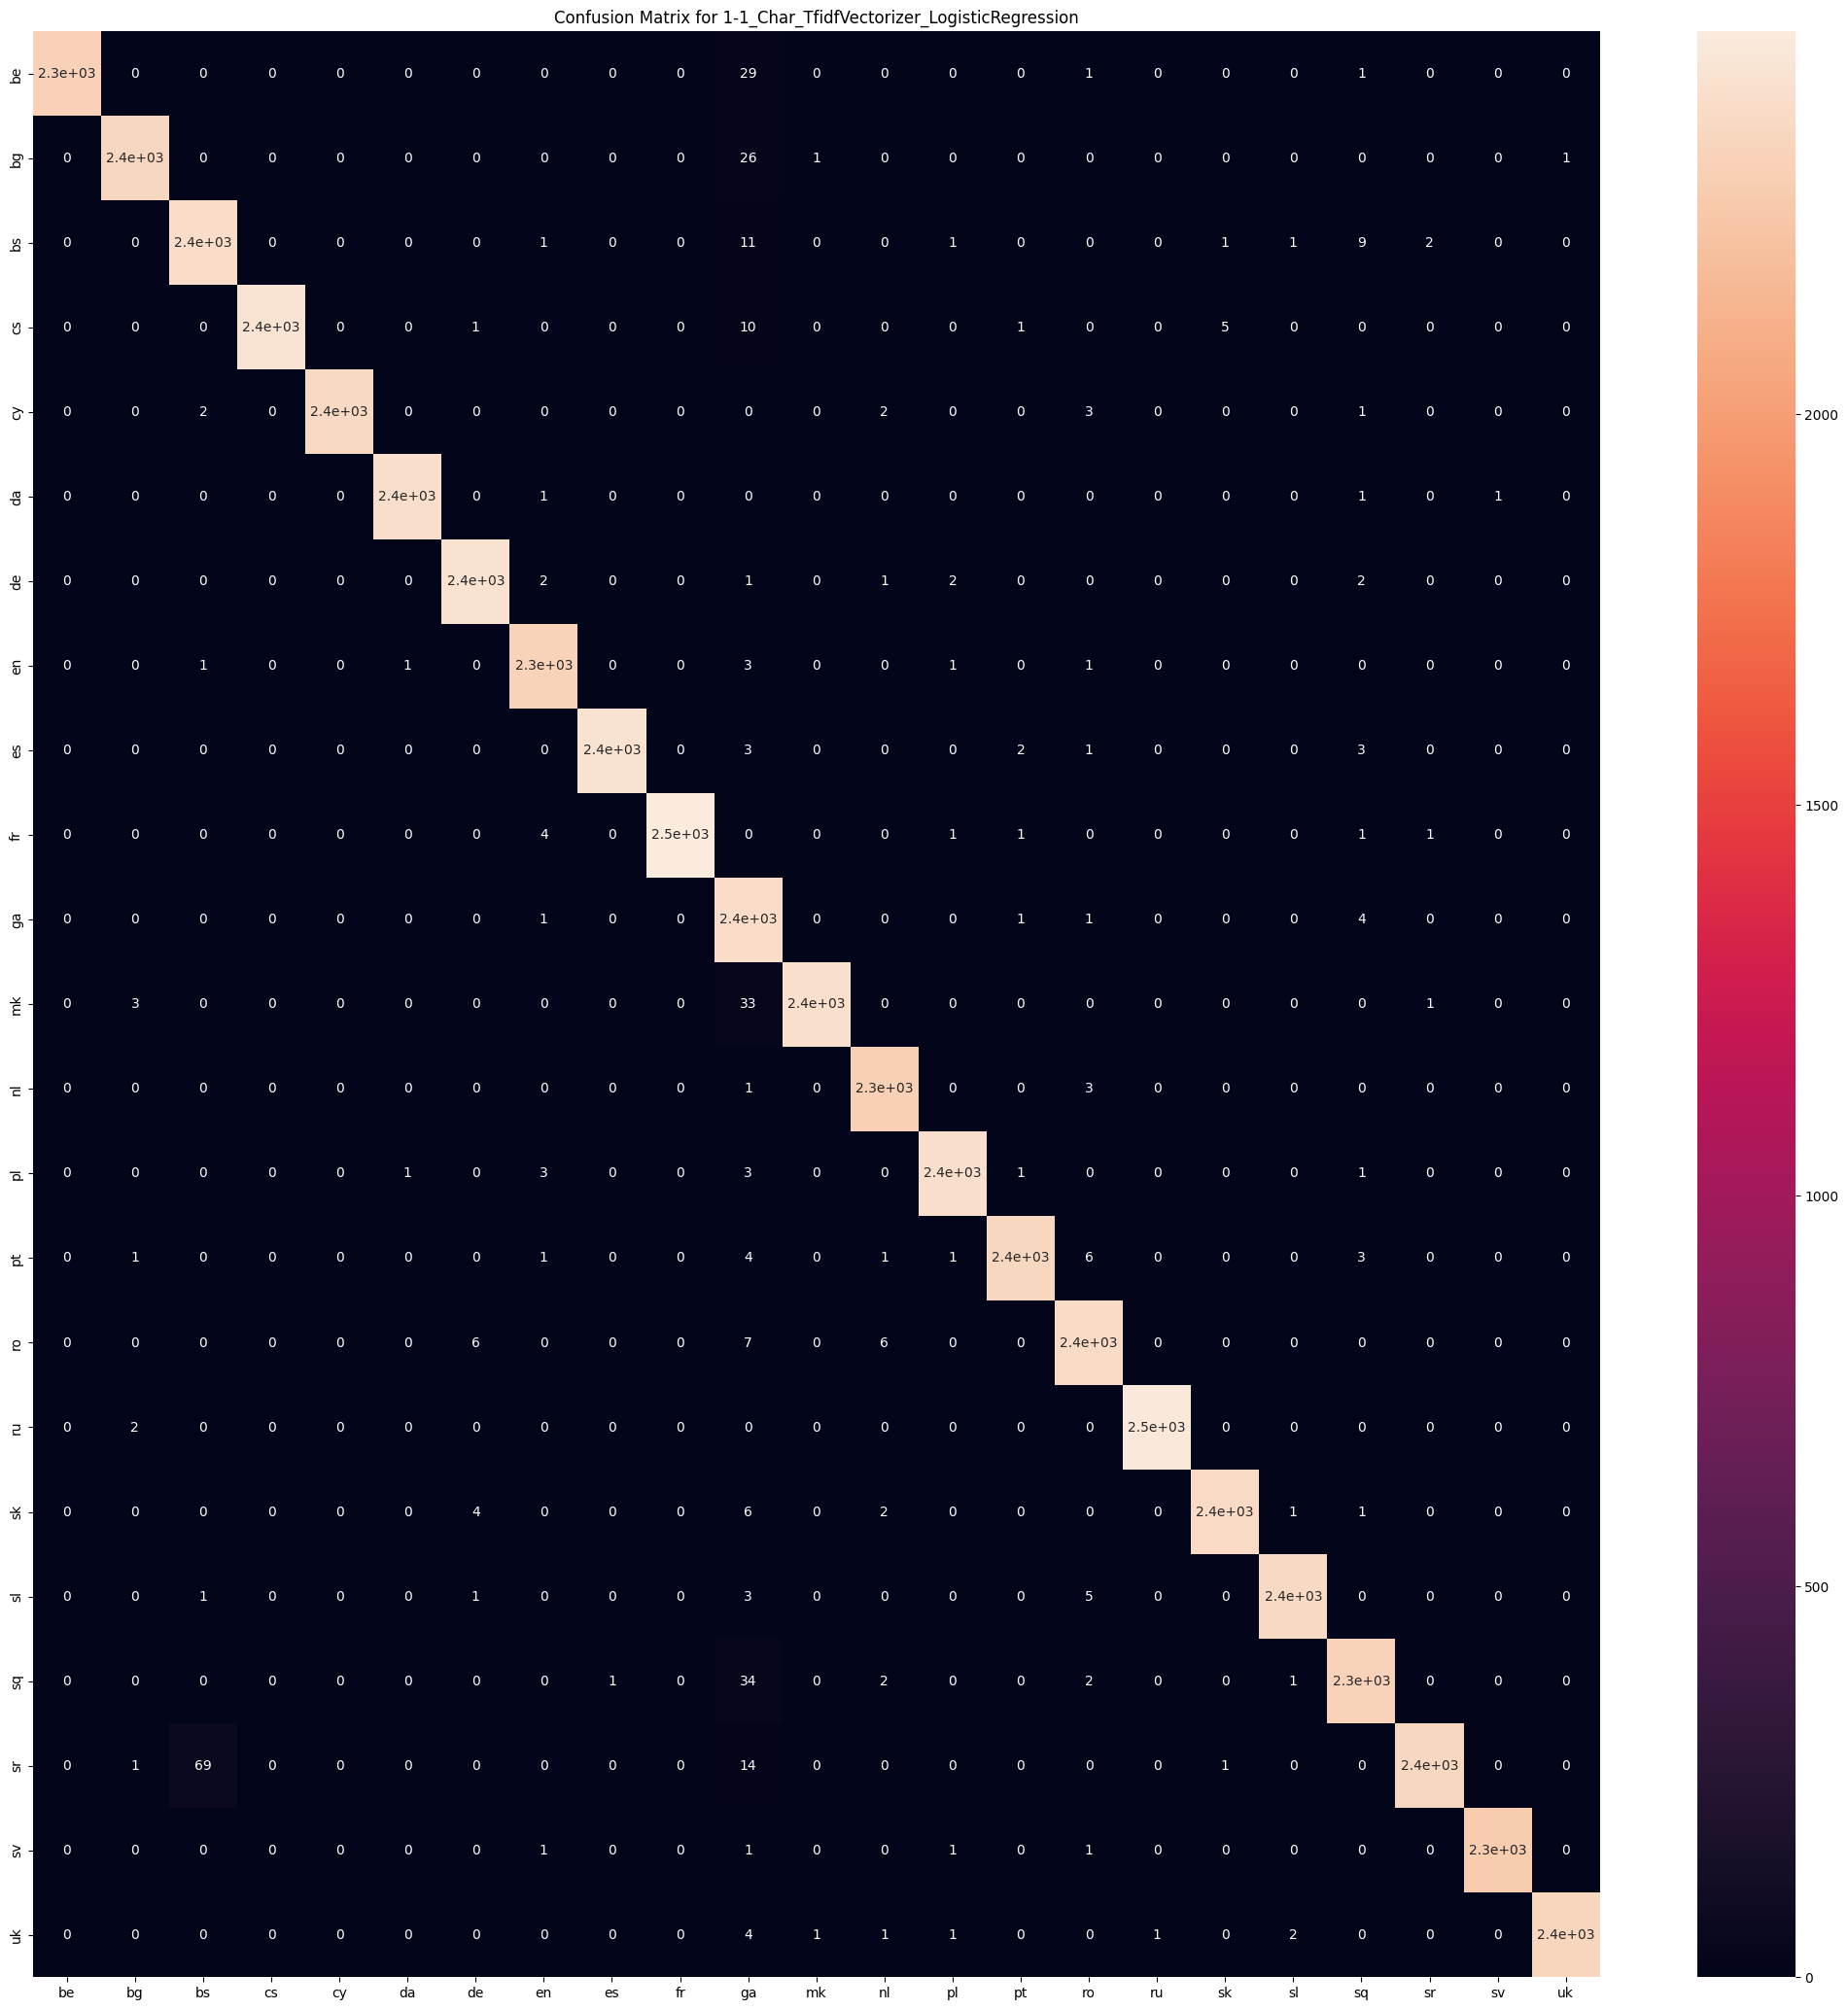

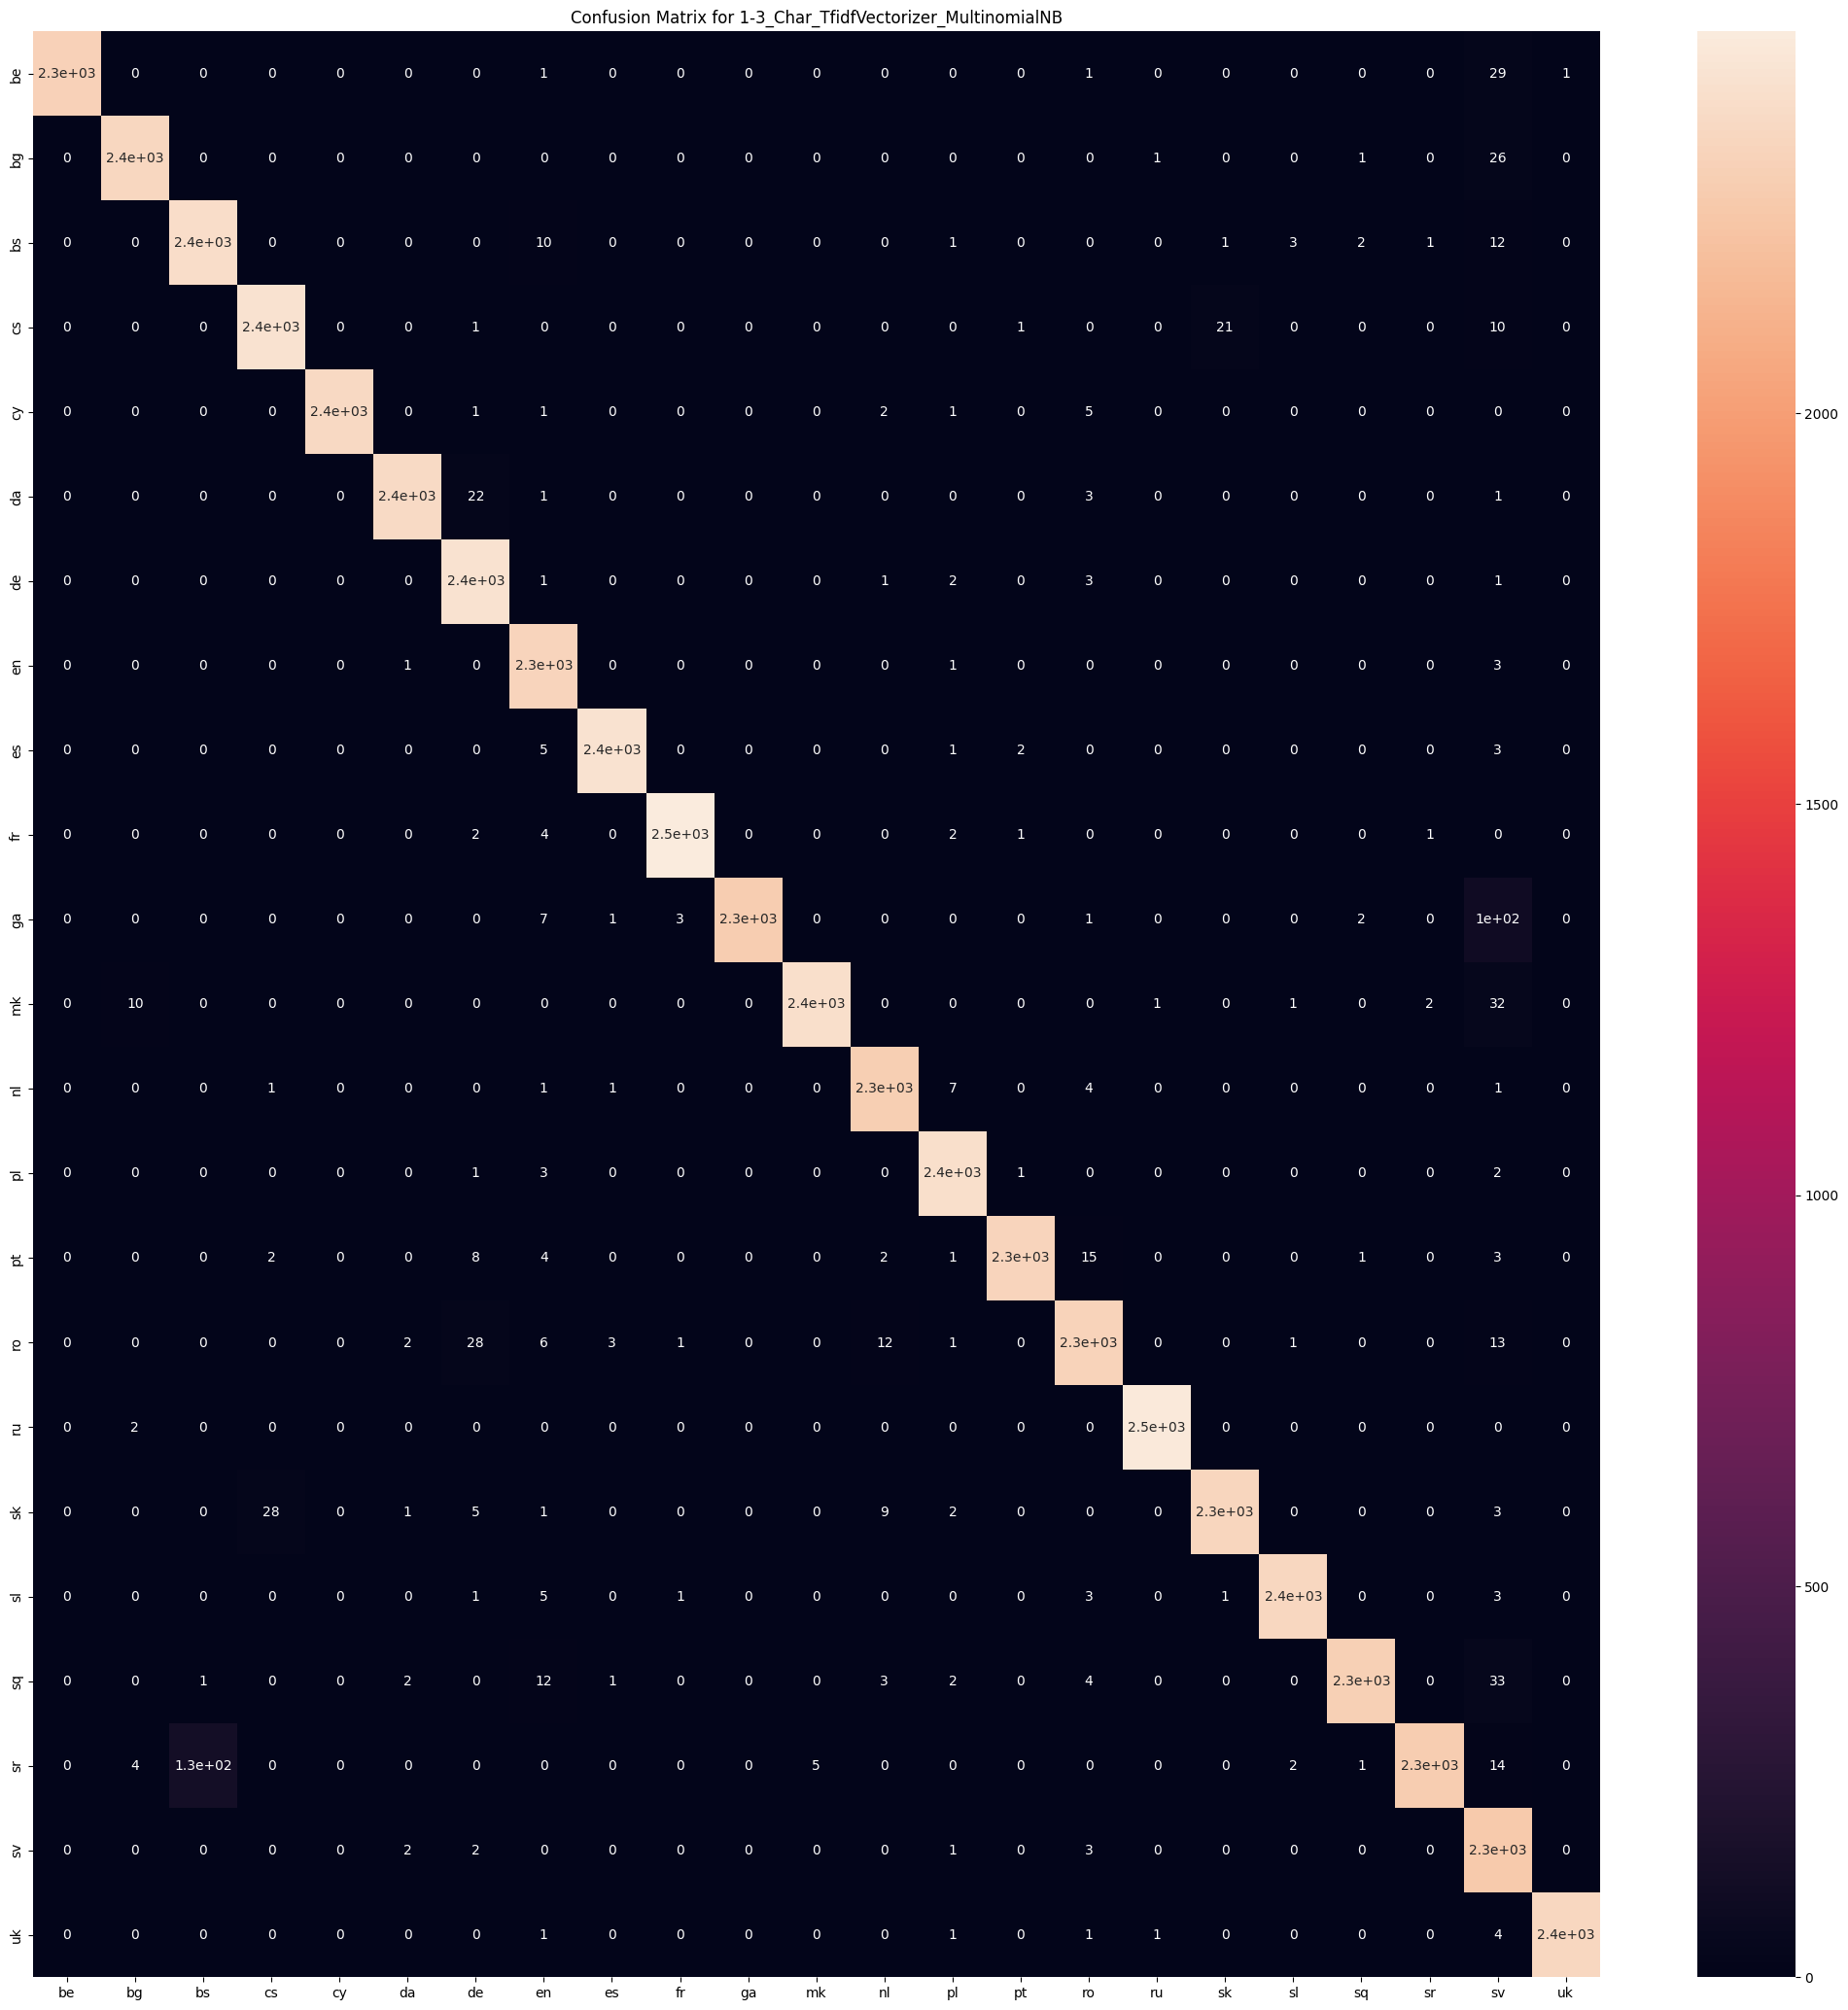

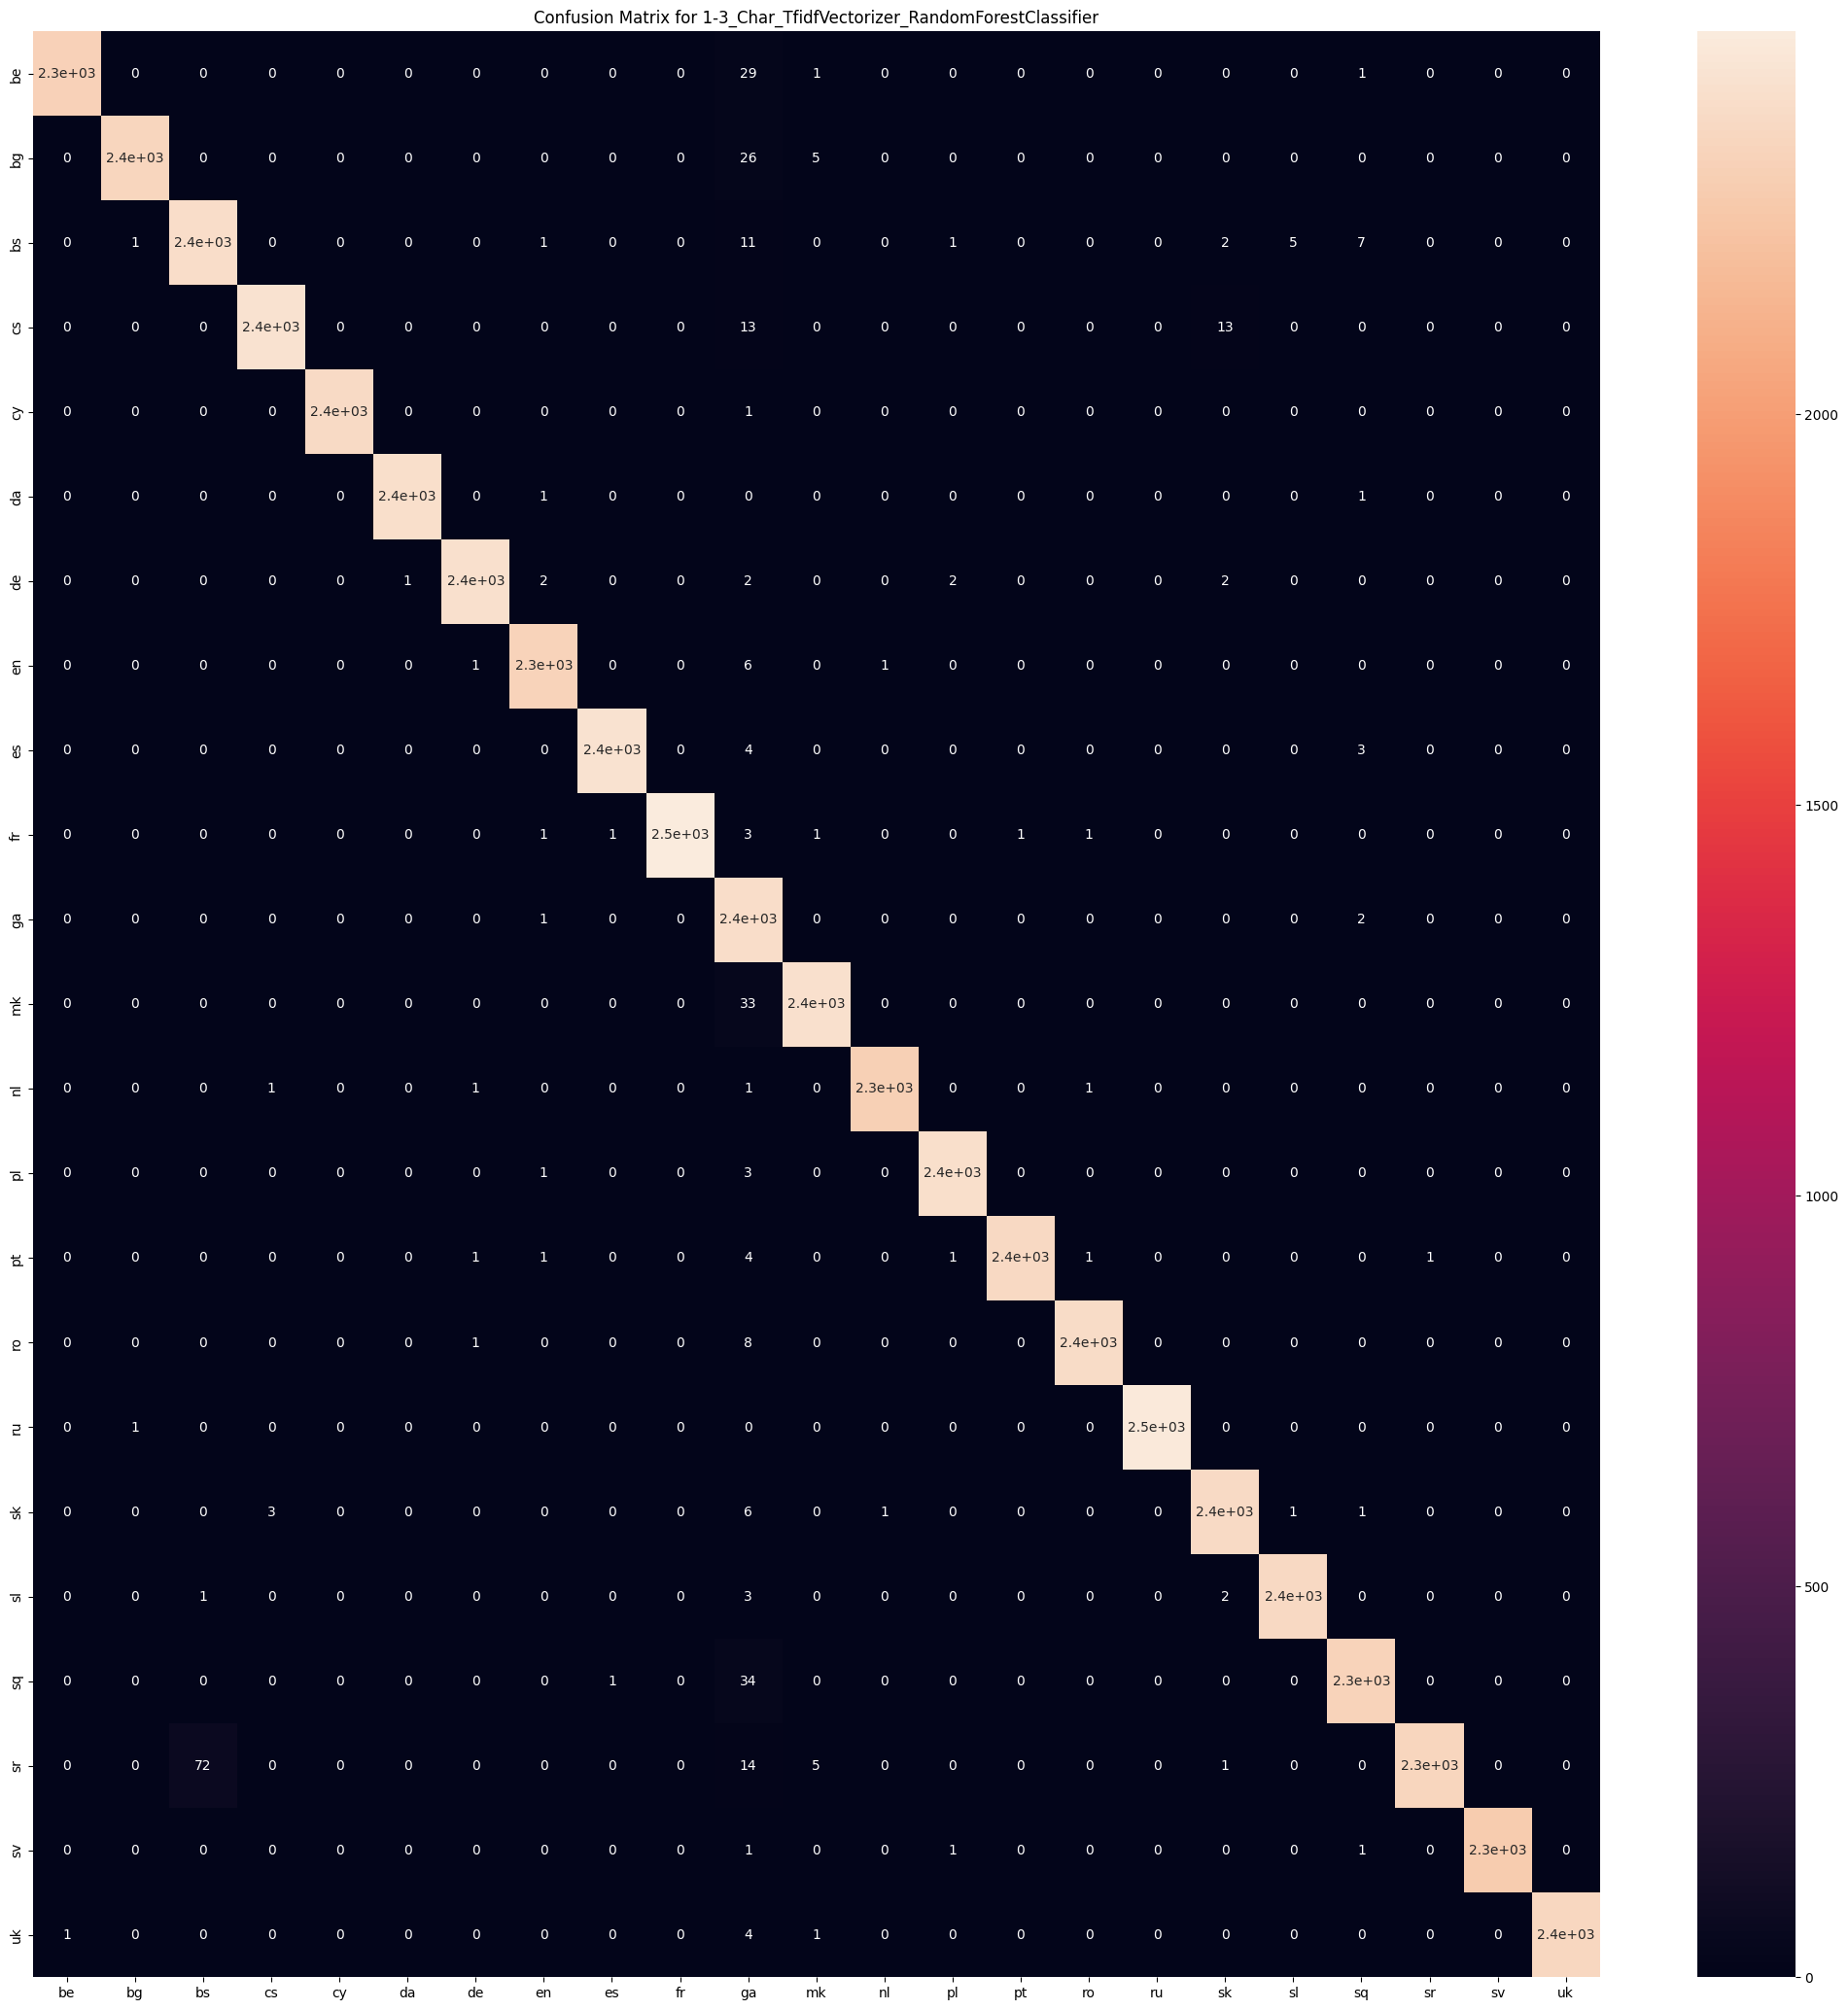

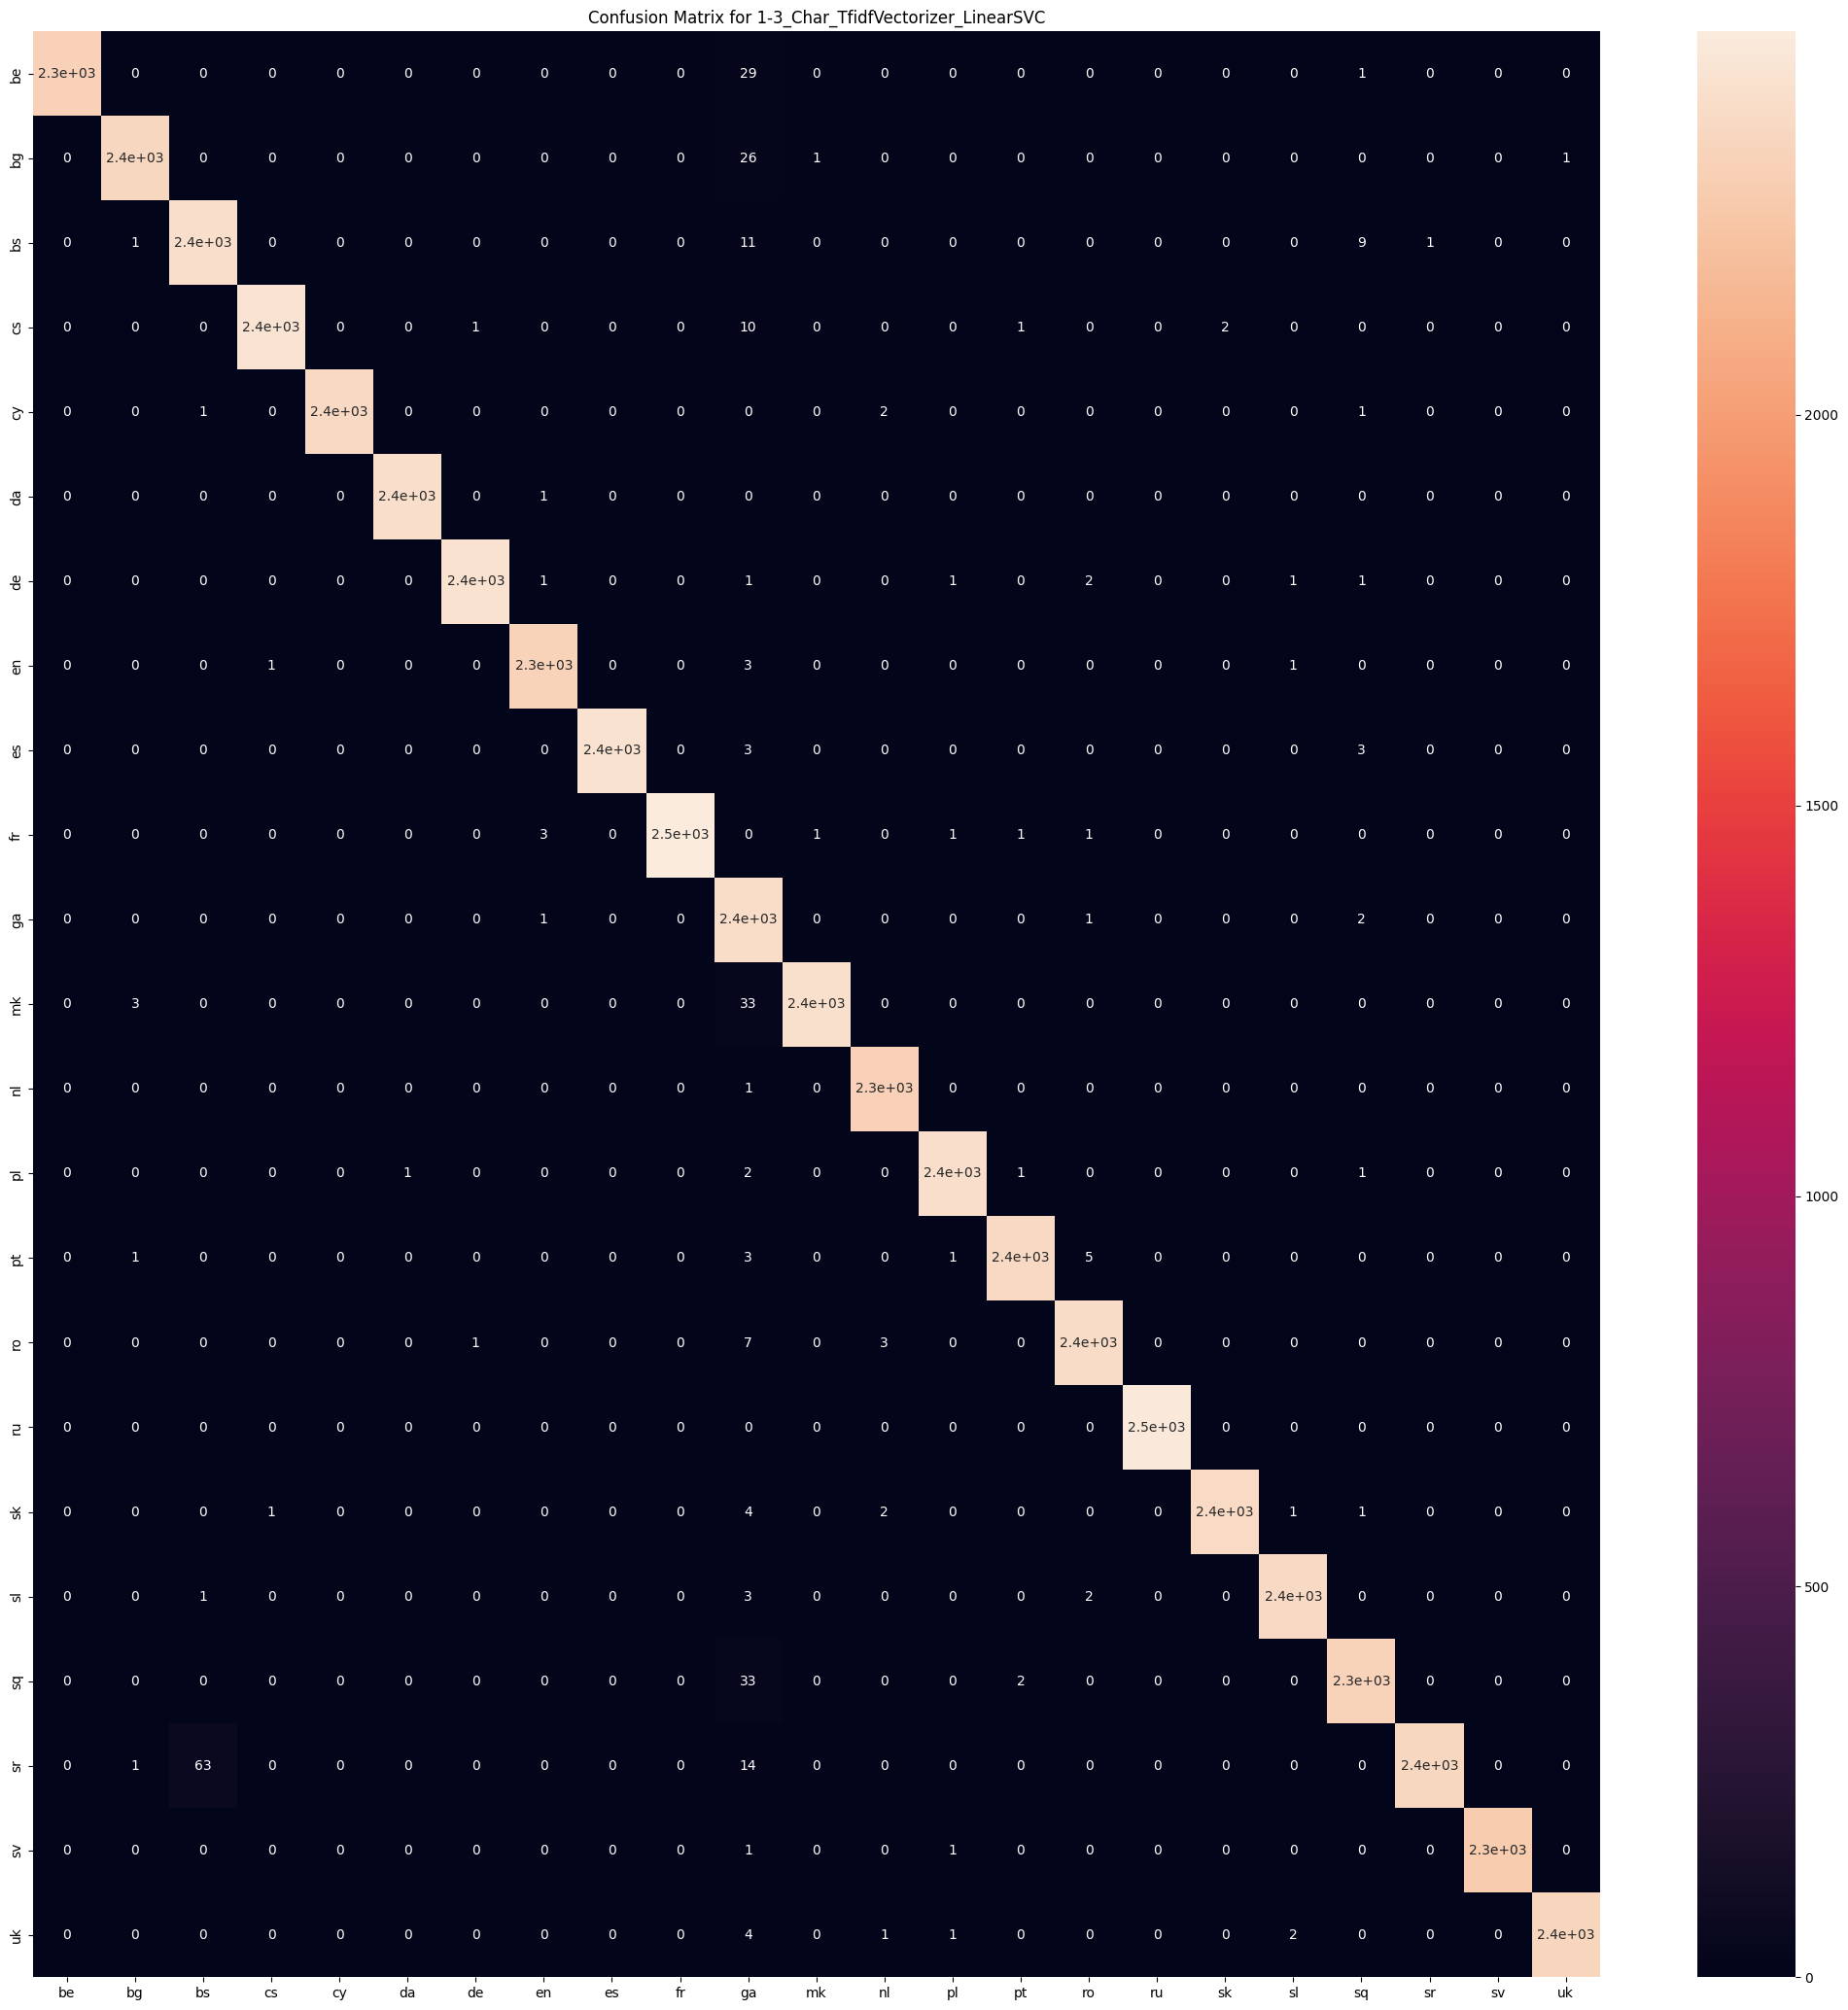

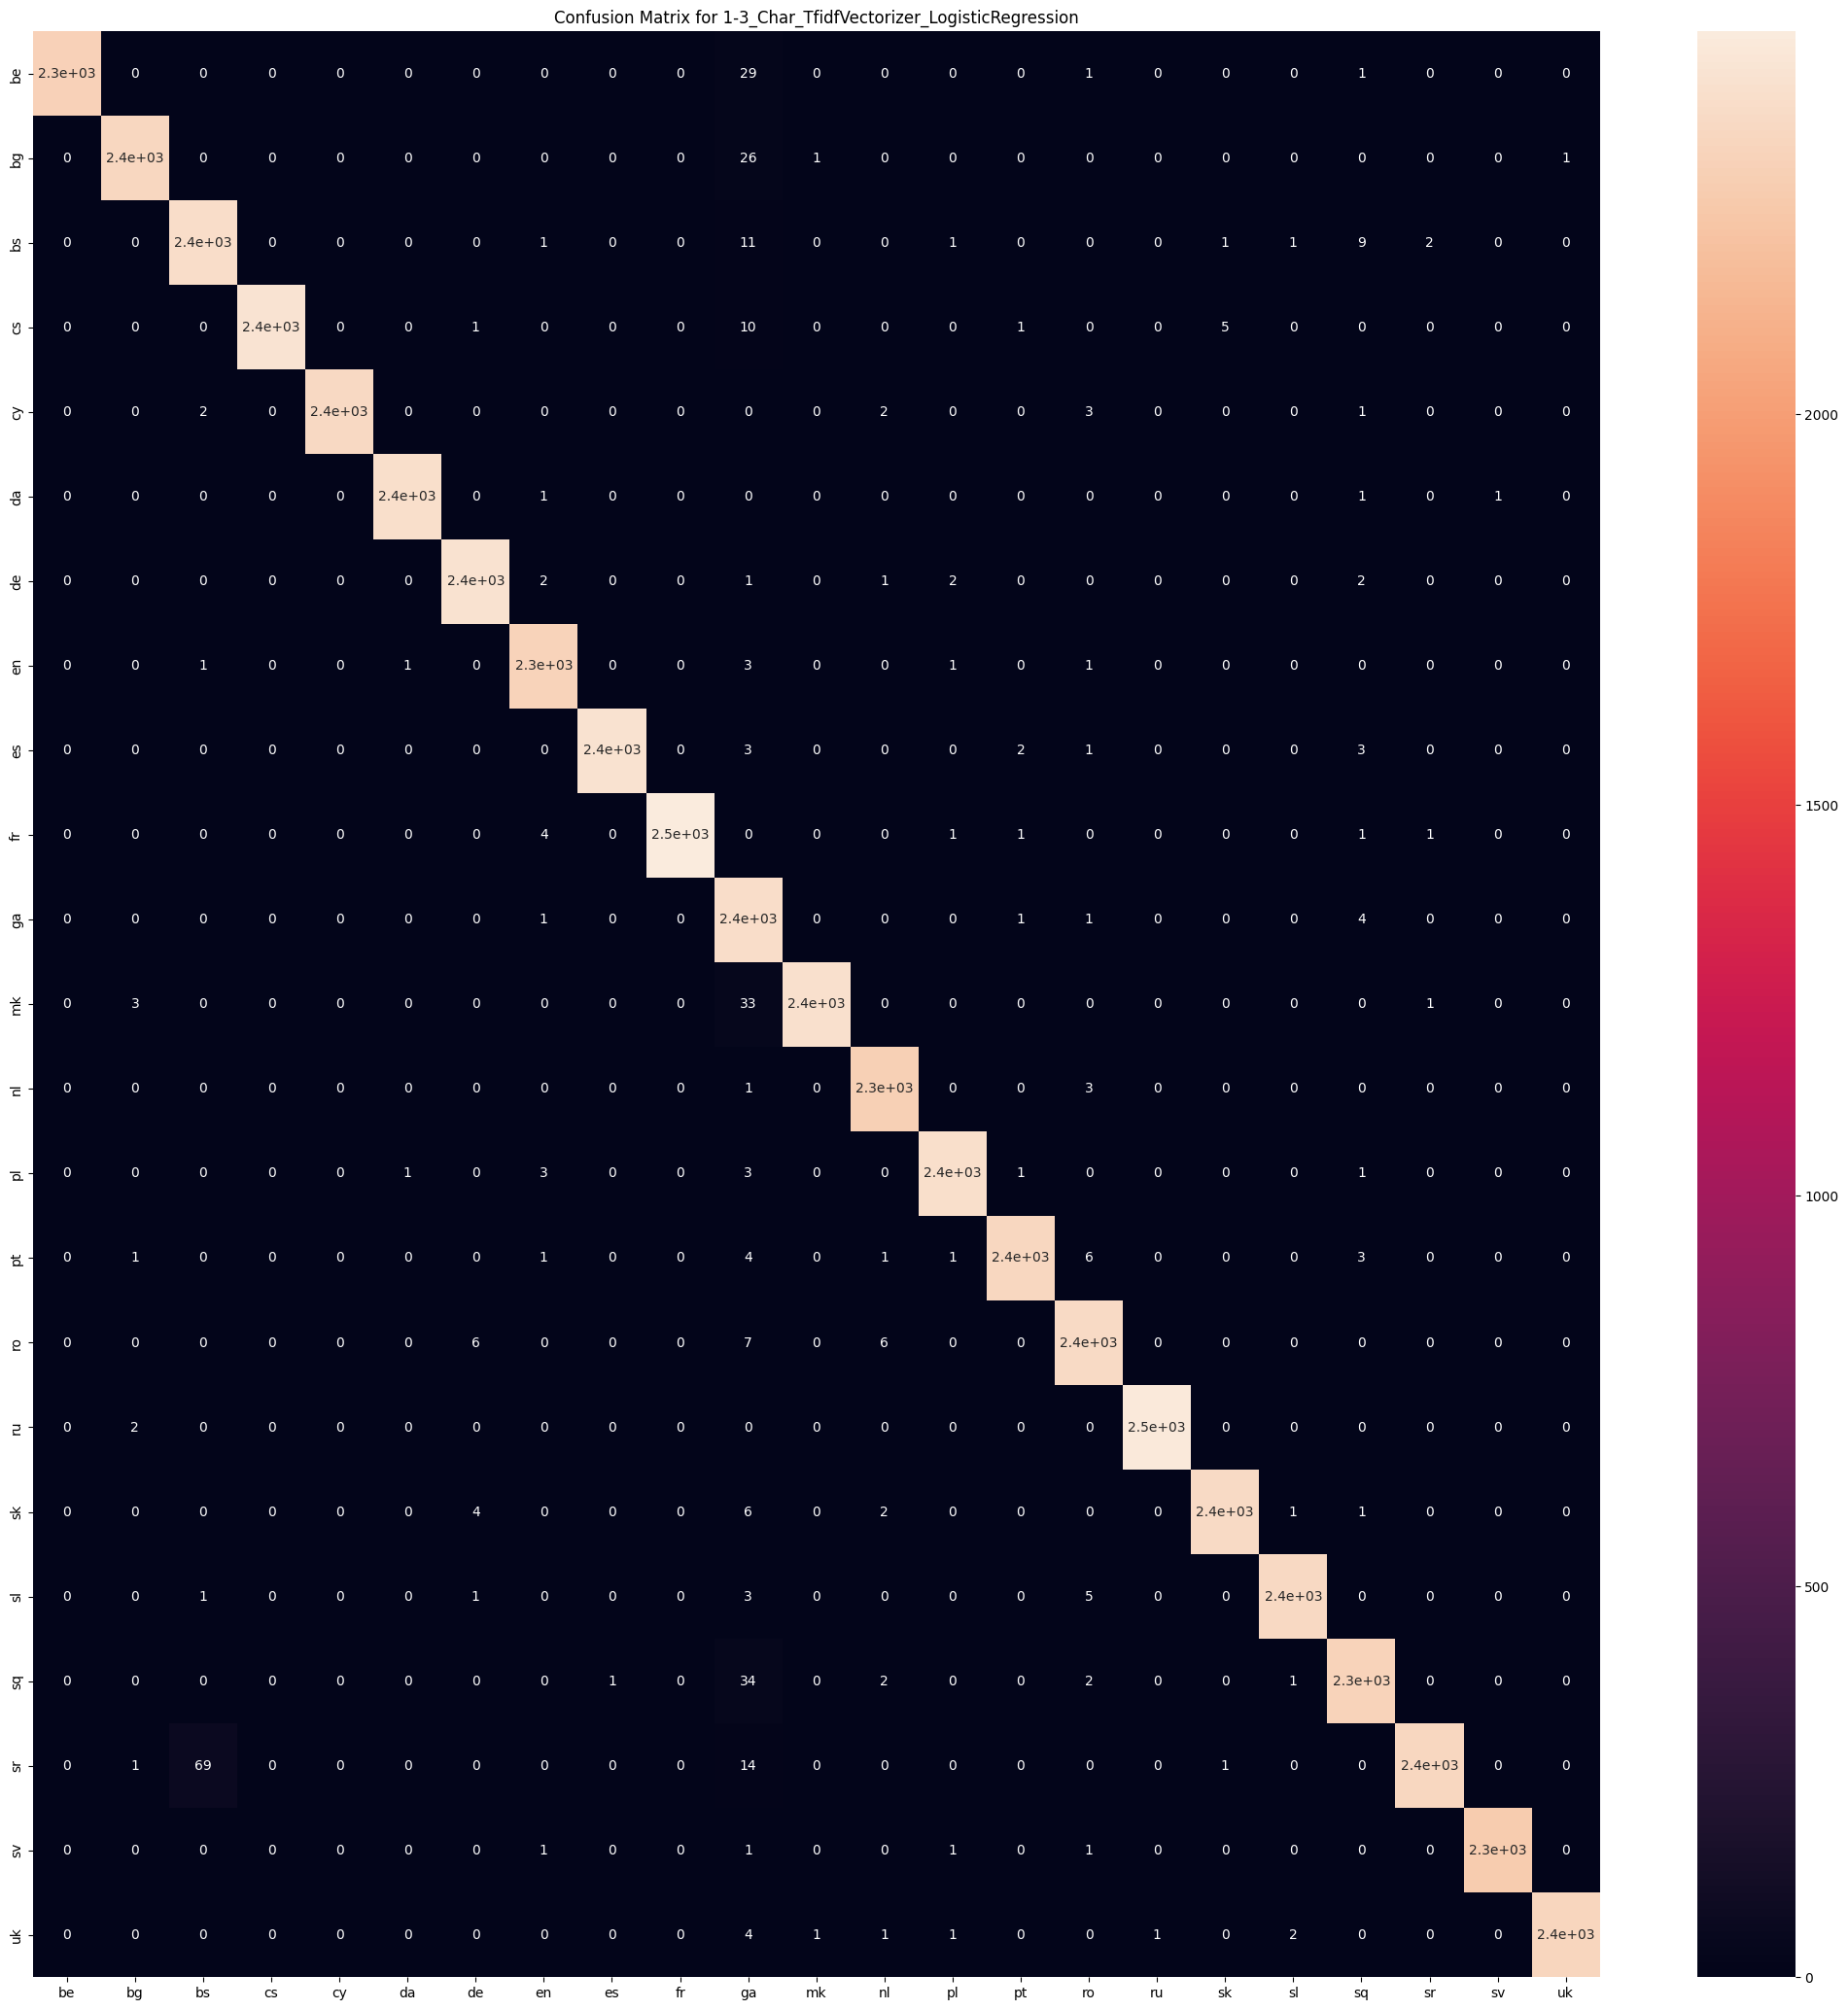

In [11]:
tasks = []

for name, vectorizer in vectorizers.items():
    for model_name, model in models.items():
        check_model(vectorizer, name, model, model_name)

In [12]:
results_data = pd.DataFrame(results)
results_data

,1-1_Char_TfidfVectorizer_MultinomialNB,1-1_Char_TfidfVectorizer_RandomForestClassifier,1-1_Char_TfidfVectorizer_LinearSVC,1-1_Char_TfidfVectorizer_LogisticRegression,1-3_Char_TfidfVectorizer_MultinomialNB,1-3_Char_TfidfVectorizer_RandomForestClassifier,1-3_Char_TfidfVectorizer_LinearSVC,1-3_Char_TfidfVectorizer_LogisticRegression
accuracy,0.985948,0.993491,0.994035,0.992693,0.985948,0.993328,0.994035,0.992693
precision,0.986455,0.993817,0.994302,0.992968,0.986455,0.993658,0.994302,0.992968
recall,0.985992,0.993519,0.994059,0.992716,0.985992,0.993360,0.994059,0.992716
f1,0.985964,0.993575,0.994103,0.992761,0.985964,0.993415,0.994103,0.992761


In [13]:
results_data.to_csv('results.csv')